In [319]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import MinMaxScaler
import torch
digits = load_digits()

In [320]:
where_0_1 = (digits.target == 0) | (digits.target == 1)

In [321]:
data = torch.tensor(digits.data[where_0_1] / 16.0).float()
target = torch.tensor(digits.target[where_0_1]).float()

In [1]:
import torch

class MyPerceptron(torch.nn.Module):
    
    def __init__(self, input_dim: int, learning_rate: float, threshold: float=0.0, cache_last_input: bool=True) -> None:
        self.w = torch.randn((input_dim, 1))
        self.b = torch.randn(1)
        self.cache_last_input = cache_last_input
        self.lr = learning_rate
        self.thresh = threshold
        
    def __call__(self, x) -> torch.Tensor:
        #tensored_data = torch.tensor(x).float()
        output = x @ self.w + self.b
        #print(output.shape)
        return (output > self.thresh).float()
    
    def update_weights(self, x, cost) -> None:
        
        #print("w shape:", self.w.shape)
        #print("x_meaan shape:", x.mean(axis=0).shape)
        #print(self.w[0:2])
        self.w = self.w + self.lr * cost * x.T
        #print(self.w[0:2])
        self.b = self.b + self.lr * cost
        
    def cost(self, y_hat, y) -> torch.Tensor:
        #print("y: ",y.shape)
        #print("y_hat: ", y_hat.shape)
        return (y - y_hat).item()

In [323]:
model = MyPerceptron(64, 0.0001)

In [324]:
# train the model
y = target
cost = 0
for ins2 in range(y.shape[0]):
    cost += model.cost(model(data[ins2, :].unsqueeze(0)), y[ins2])
cost /= y.shape[0]
print(f"Initial Cost: {cost:.4f}")

for i in range(10):    
    for ins in range(y.shape[0]):
        cost = model.cost(model(data[ins, :].unsqueeze(0)), y[ins])
        model.update_weights(data[ins, :].unsqueeze(0), cost)
        
    cost = 0
    for ins2 in range(y.shape[0]):
        cost += model.cost(model(data[ins2, :].unsqueeze(0)), y[ins2])
    cost /= y.shape[0]
    print(f"{i} -> Cost: {cost:.4f}")

Initial Cost: -0.4944
0 -> Cost: -0.4944
1 -> Cost: -0.4917
2 -> Cost: -0.4889
3 -> Cost: -0.4861
4 -> Cost: -0.4806
5 -> Cost: -0.4778
6 -> Cost: -0.4750
7 -> Cost: -0.4611
8 -> Cost: -0.4389
9 -> Cost: -0.4333


In [11]:
# Implementing Textbook Perceptron Learning Rule
import numpy as np

class Perceptron:
    """Perceptron classifier.
    
    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
    random_state : int
        Random number generator seed for random weight
        initialization.
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    b_ : float
        Bias unit after fitting.
        
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data.
        
        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
            Training vectors, where n_examples
            is the number of examples and
            n_features is the number of features.
        y : array-like, shape = [n_examples]
            Target values.
            
        Returns
        -------
        self : object
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.b_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1)
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                #print(xi.shape)
                #print(self.w_[1:].shape)
                #print(self.w_[0].shape)
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return X @ self.w_[1:] + self.w_[0] + self.b_
    
    def __call__(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [3]:
# Train the model on the iris dataset
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('From URL:', s)
df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


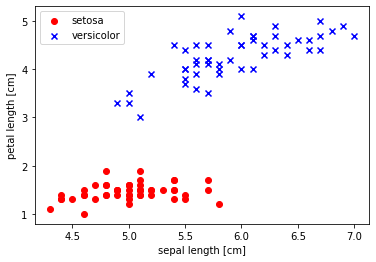

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
              color='red', marker='o', label='setosa')

plt.scatter(X[50:100, 0], X[50:100, 1],
                color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [5]:
# Train my own model
my_model = MyPerceptron(2, 0.01)

# train the model
target = torch.tensor(y.copy()).float()
data = torch.tensor(X.copy()).float()
cost = 0

for ins2 in range(target.shape[0]):
    cost += my_model.cost(my_model(data[ins2, :].unsqueeze(0)), target[ins2])
cost /= target.shape[0]
print(f"Initial Cost: {cost:.4f}")

for i in range(5):    
    for ins in range(y.shape[0]):
        cost = my_model.cost(my_model(data[ins, :].unsqueeze(0)), target[ins])
        my_model.update_weights(data[ins, :].unsqueeze(0), cost)
        
    cost = 0
    for ins2 in range(y.shape[0]):
        cost += my_model.cost(my_model(data[ins2, :].unsqueeze(0)), target[ins2])
    cost /= target.shape[0]
    print(f"{i} -> Cost: {cost:.4f}")

Initial Cost: -0.5000
0 -> Cost: 0.0000
1 -> Cost: 0.0000
2 -> Cost: 0.0000
3 -> Cost: 0.0000
4 -> Cost: 0.0000


In [6]:
# Visualize the decision boundary
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02, title="My Perceptron"):
    
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'green', 'cyan', 'gray')
    
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() -1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() -1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    
    Z = classifier(torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float())
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                   y=X[y == cl, 1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
    plt.title(title)

/var/folders/cq/1h10cbc11r35ypfm194v2shc0000gn/T/ipykernel_51984/578010154.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


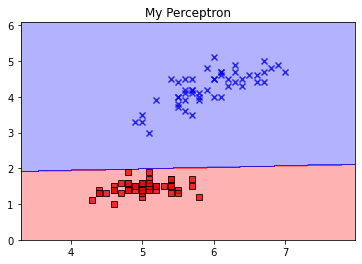

In [7]:
plot_decision_regions(X, y, classifier=my_model)

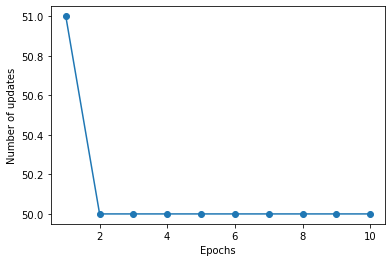

In [12]:
# Textbook model
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
        ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

/var/folders/cq/1h10cbc11r35ypfm194v2shc0000gn/T/ipykernel_51984/578010154.py:28: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


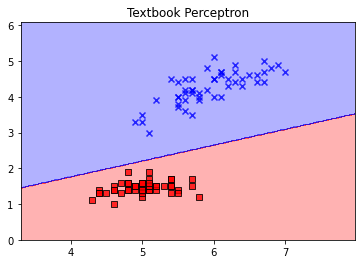

In [13]:
# Plot decision boundary
plot_decision_regions(X, y, classifier=ppn, title="Textbook Perceptron")